<a href="https://colab.research.google.com/github/ICam99/cdsi2025/blob/main/semana5/semana5_IgnacioC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 5: Notebook procesamiento de imágenes

Importamos las librerías necesarias

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from scipy import misc

Tomamos una imagen de internet que queremos procesar.

In [3]:
img = cv.imread('gatosandiaxd-gatos.png')

Primero le aplicamos escala de grises a la imagen.

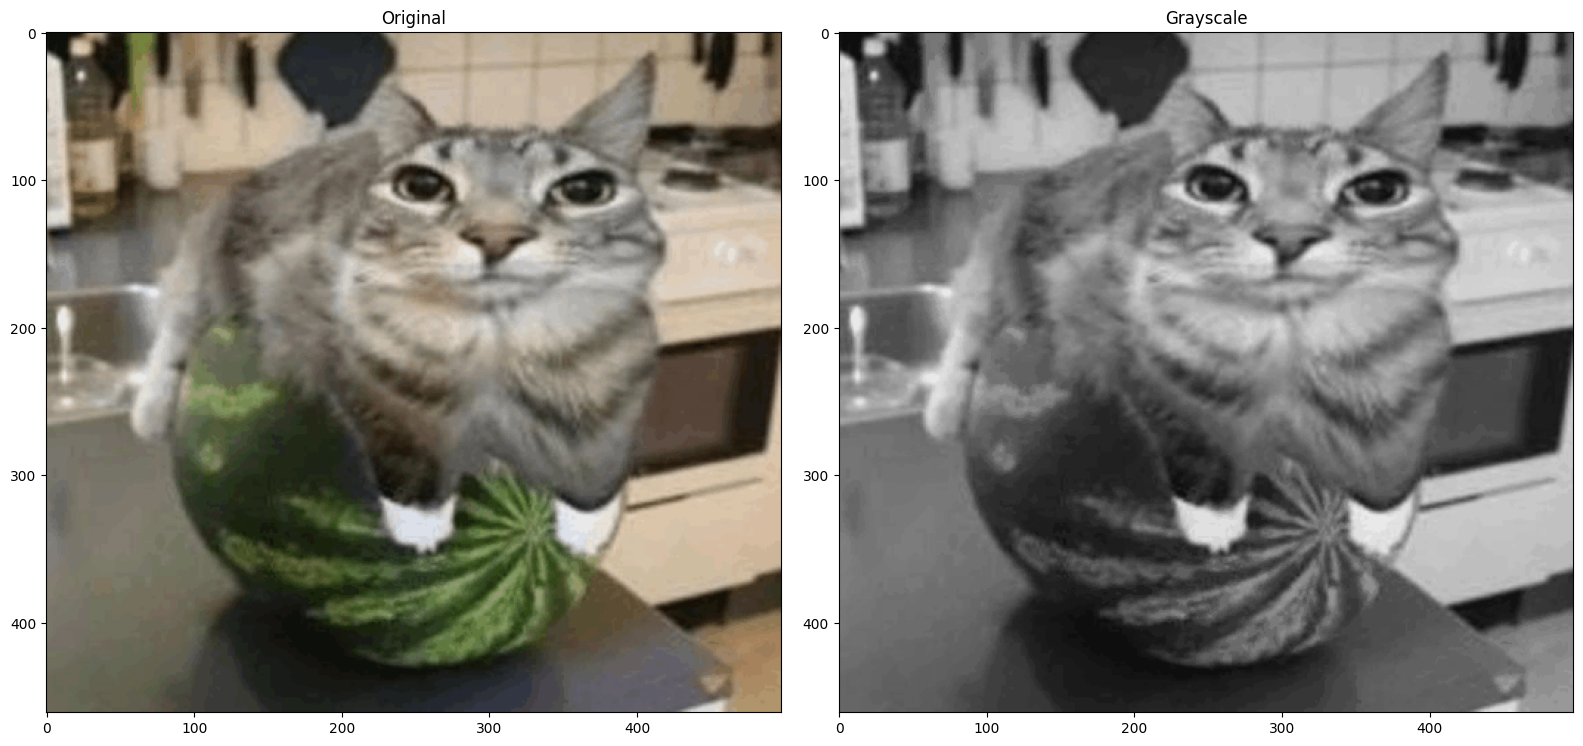

In [4]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv.cvtColor(gray_image, cv.COLOR_BGR2RGB))
ax[1].set_title("Grayscale")
plt.show()

Aplicamos rotación sobre la imagen.

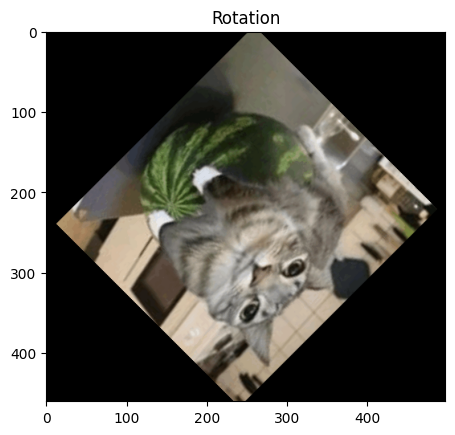

In [5]:
h, w = img.shape[:2]
rotation_matrix = cv.getRotationMatrix2D((w/2,h/2), -135, 0.7)

rotated_image = cv.warpAffine(img, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()

Tomamos ahora una fotografía. Sobre esta utilizaremos la función *GaussianBlur* que nos generará ahora la imagen con un efecto borroso.

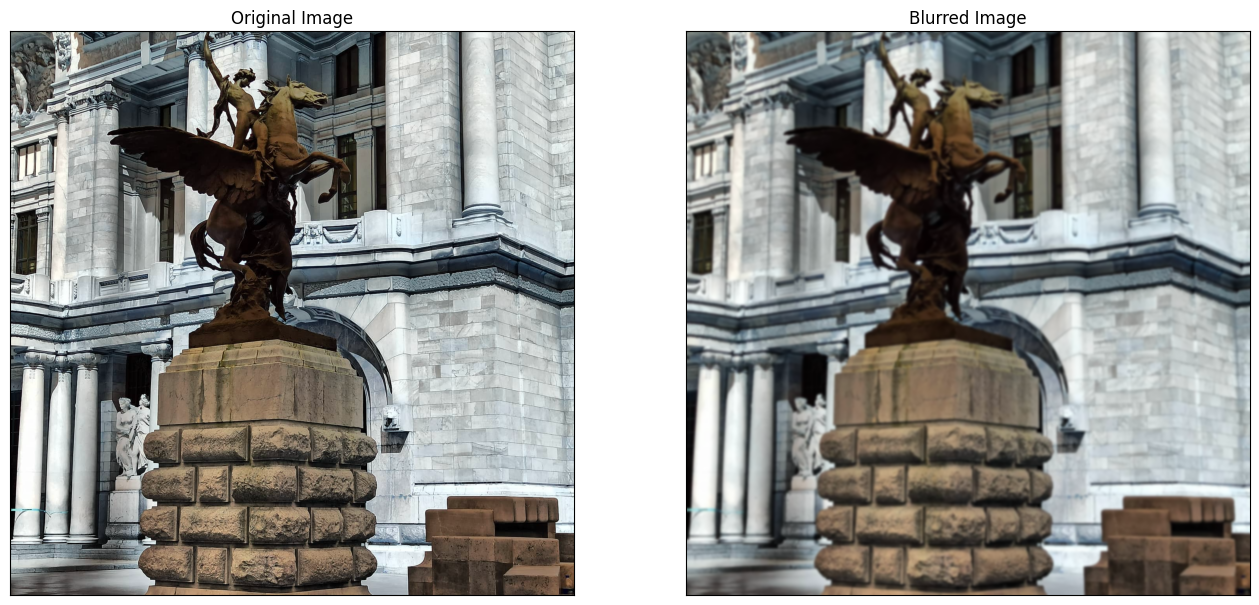

In [6]:
img2 = cv.imread('foto.jpg')

blurred_face = cv.GaussianBlur(img2, (15, 15), 3)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img2)
ax[0].set_title("Original Image")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(blurred_face)
ax[1].set_title("Blurred Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

Este efecto borroso es util cuando se quiere mejorar la imagen, ya que utilizando la operación de substracción de la imagen borrosa sobre la original da el efecto de una imagen más clara que la inicial.

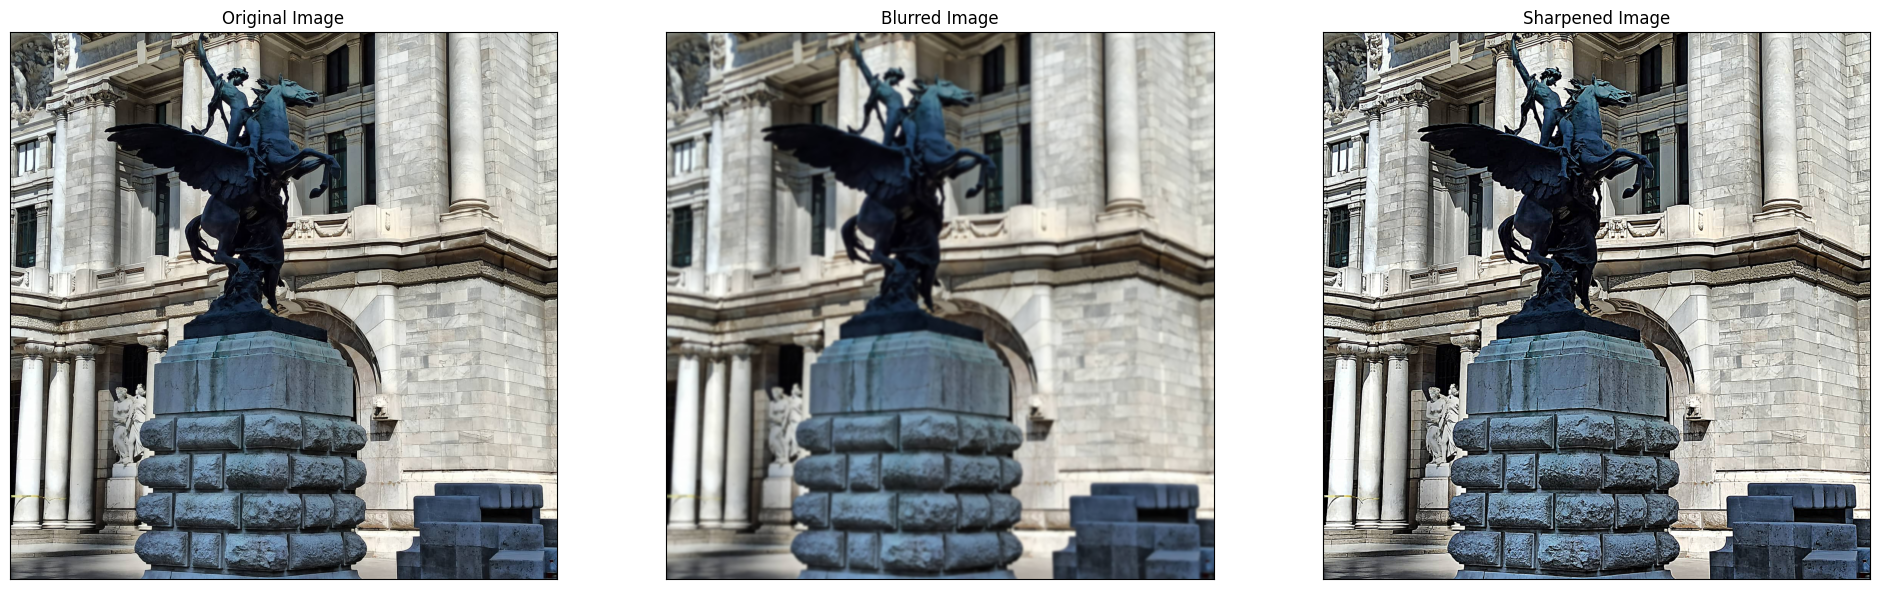

In [7]:
# Calcula la diferencia entre la imagen original y la imagen borrosa
sharpened_image = cv.addWeighted(img2, 2, blurred_face, -1, 0)

sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Muestra las imagenes
fig, ax = plt.subplots(1, 3, figsize=(24, 8))

ax[0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(blurred_face, cv.COLOR_BGR2RGB))
ax[1].set_title("Blurred Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(cv.cvtColor(sharpened_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Sharpened Image")
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()


Por último tomamos un video y utilizamos detección de bordes sobre el. Se muestra un frame aleatorio del efecto aplicado.

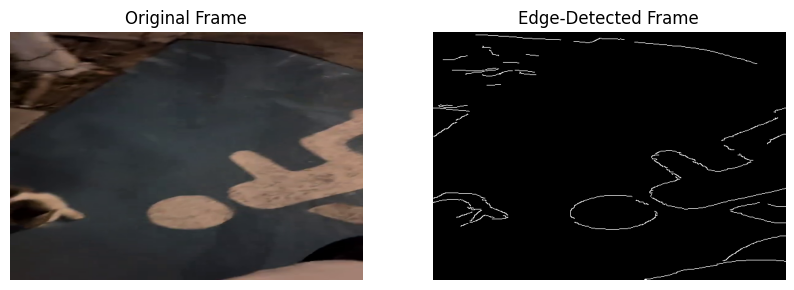

In [26]:
from google.colab.patches import cv2_imshow
import random

# Leemos el video
cap = cv.VideoCapture('gato_educado.mp4')

# Obtenemos el total de frames (para la selección aleatoria)
total_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

# Se genera el número aleatorio del frame
random_frame_number = random.randint(0, total_frames - 1)

cap.set(cv.CAP_PROP_POS_FRAMES, random_frame_number)

ret, frame = cap.read()

if ret:
    frame = cv.resize(frame, (540, 380), fx=0, fy=0, interpolation=cv.INTER_CUBIC)
    edge_detect = cv.Canny(frame, 100, 200)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    ax1.set_title("Original Frame")
    ax1.axis("off")

    ax2.imshow(cv.cvtColor(edge_detect, cv.COLOR_BGR2RGB))
    ax2.set_title("Edge-Detected Frame")
    ax2.axis("off")

    plt.show()

cap.release()
cv.destroyAllWindows()